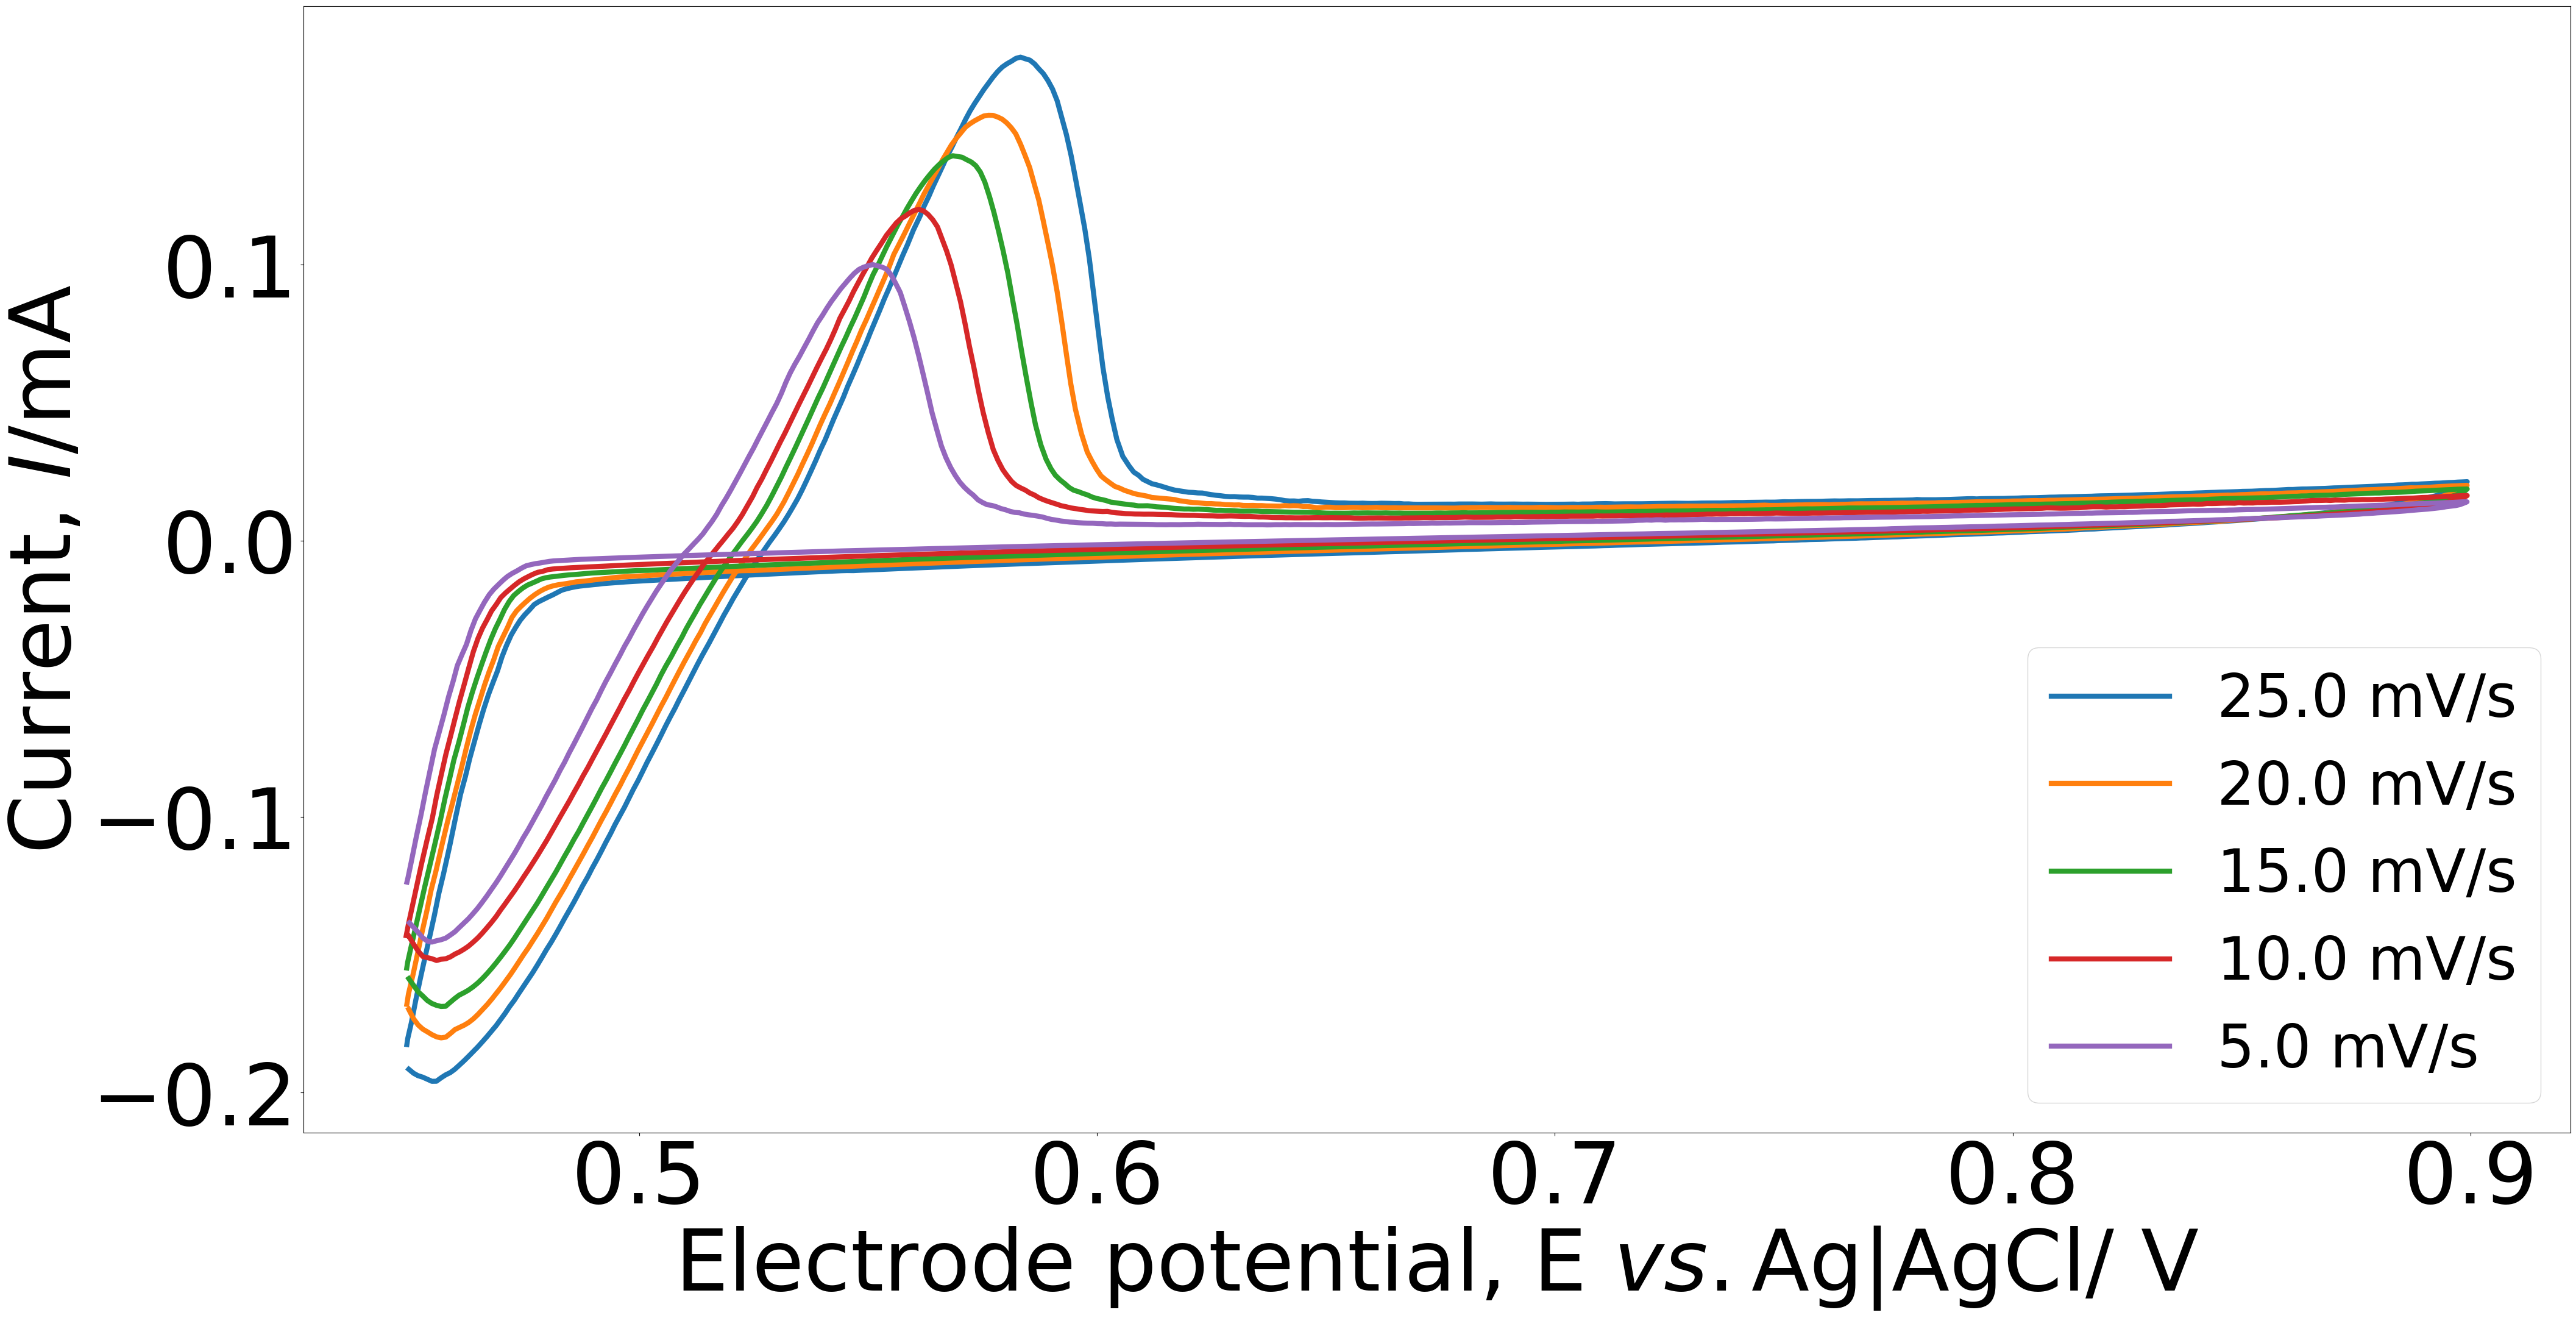

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def read_data_from_file(file_path):
    # Read the data from the file
    data = np.loadtxt(file_path)
    
    # Split the data into two columns
    column1 = data[:, 0]
    column2 = data[:, 1]
    column3 = data[:, 2]
    
    return column1, column2, column3

# Example usage:
file1 = 'AgNO3/25mvs.csv'  
column1, column2, column3 = read_data_from_file(file1)
file2 = 'AgNO3/20mvs.csv'   
column4, column5, column6 = read_data_from_file(file2)
file3 = 'AgNO3/15mvs.csv' 
column7, column8, column9 = read_data_from_file(file3)
file4 = 'AgNO3/10mvs.csv'   
column10, column11, column12 = read_data_from_file(file4)
file5 = 'AgNO3/5mvs.csv'  
column13, column14, column15 = read_data_from_file(file5)

v1 = np.abs((column1[100] - column1[1]) / (column3[100] - column3[1]) * 1000)    # scan rate  mV/s
v2 = np.abs((column4[100] - column4[1]) / (column6[100] - column6[1]) * 1000)    # scan rate  mV/s
v3 = np.abs((column7[100] - column7[1]) / (column9[100] - column9[1]) * 1000)    # scan rate  mV/s
v4 = np.abs((column10[100] - column10[1]) / (column12[100] - column12[1]) * 1000)  # scan rate mV/s
v5 = np.abs((column13[100] - column13[1]) / (column15[100] - column15[1]) * 1000)  # scan rate mV/s

plt.figure(figsize=(48, 24))
plt.plot(column1,column2,linewidth=6)
plt.plot(column4,column5,linewidth=6)
plt.plot(column7,column8,linewidth=6)
plt.plot(column10,column11,linewidth=6)
plt.plot(column13,column14,linewidth=6)
plt.legend([f'{v1:.1f} mV/s', f'{v2:.1f} mV/s', f'{v3:.1f} mV/s', f'{v4:.1f} mV/s', f'{v5:.1f} mV/s'], fontsize=70)
plt.xlabel('Electrode potential, E $\\it{vs.}$$\mathrm{Ag|AgCl}$/ V', fontsize=100)
plt.ylabel('Current, $\\it{I}$/mA',fontsize=100)
plt.tick_params(axis='both', labelsize=100)

1: 25 mV/s,    2: 20 mV/s,    3: 15 mV/s,    4: 10 mV/s,    5: 5 mV/s
Which CV do you want to plot your data onto? Just choose its number (e.g., 1 for the first one).: 2


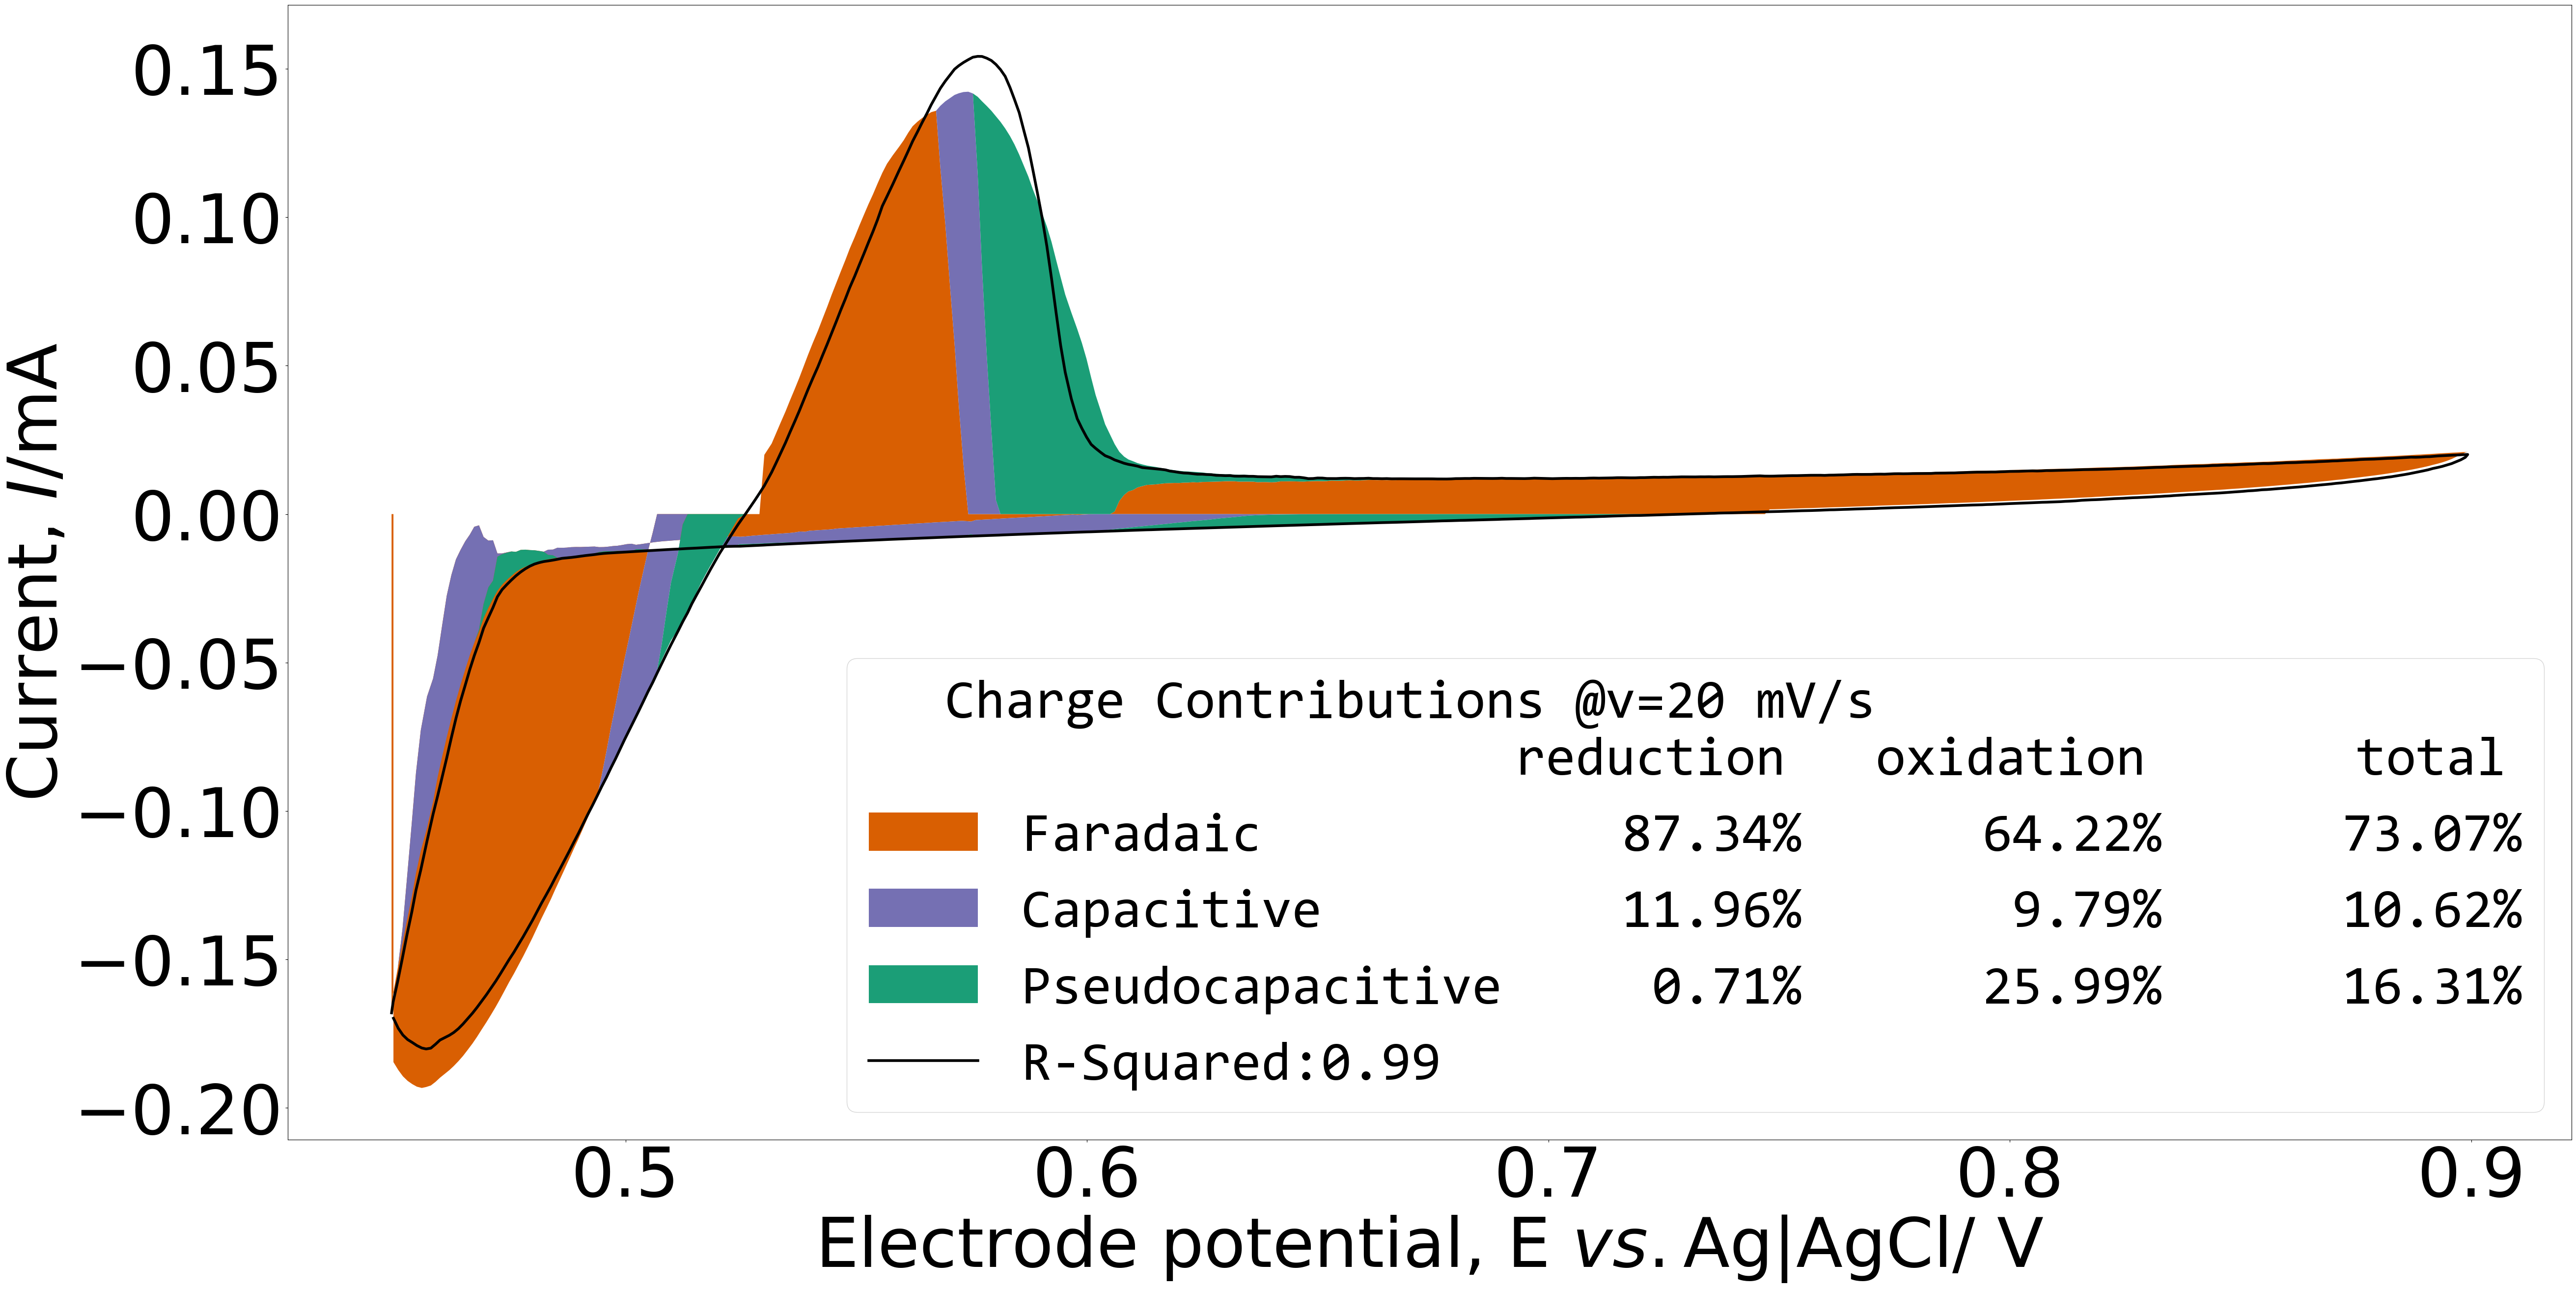

In [2]:
import numpy as np
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
from scipy.integrate import quad
from scipy.integrate import simps

ifara=[]
icapa=[]
ipseudo=[]
voltage_p=[]
voltage_n=[]

x = [v1 ,v2, v3 ,v4, v5]
#choosing the scan rate we aim to plot
print(f"1: {v1:.0f} mV/s,    2: {v2:.0f} mV/s,    3: {v3:.0f} mV/s,    4: {v4:.0f} mV/s,    5: {v5:.0f} mV/s")
v_input=int(input("Which CV do you want to plot your data onto? Just choose its number (e.g., 1 for the first one).: "))
if v_input==1:
    potential = column1
    current = column2
    scan_rate=v1
if v_input==2:
    potential = column4
    current = column5
    scan_rate=v2
if v_input==3:
    potential = column7
    current = column8
    scan_rate=v3
if v_input==4:
    potential = column10
    current = column11
    scan_rate=v4
if v_input==5:
    potential = column13
    current = column14
    scan_rate=v5

for i in range(len(potential)):
    
    i1=column2[i]
    i2=column5[i]
    i3=column8[i]
    i4=column11[i]
    i5=column14[i]

    
    if i1<0:
        y=[-i1,-i2,-i3,-i4,-i5]
    if i1>0:    
        y=[i1,i2,i3,i4,i5]
    # Define the model function
    def model(x, a, b, c):
        return a * np.sqrt(x) + b * x + c * x**1.5

    # Perform curve fitting with non-negative constraints
    params, covariance = curve_fit(model, x, y, bounds=(0, np.inf))

    # Extract the parameters
    a, b, c = params
    
    if i1<0:
        ifarad = -a * np.sqrt(scan_rate)
        icapac = -b * scan_rate
        ipseudoc = -c * scan_rate**1.5
        voltage_n=np.append(voltage_n,potential[i])
        
    if i1>=0:
        ifarad = a * np.sqrt(scan_rate)
        icapac = b * scan_rate
        ipseudoc = c * scan_rate**1.5
        voltage_p=np.append(voltage_p,potential[i])
        
    ifara = np.append(ifara, ifarad)
    icapa = np.append(icapa, icapac)
    ipseudo = np.append(ipseudo, ipseudoc)

i_predict = np.array(ifara) + np.array(icapa) + np.array(ipseudo)
i_real = np.array(current)
# Compute R²
r2 = r2_score(i_real, i_predict)   

plt.figure(figsize=(60, 30))

plt.stackplot(potential, ifara, icapa, ipseudo,
              labels=['i Faradaic','i Capacitive','i Pseudocapacitive'],
              colors=['#d95f02','#7570b3','#1b9e77'])
plt.plot(potential, current, linewidth=4, color='black',
         label=f"i total @v={scan_rate:.0f} mV/s")

plt.xlabel('Electrode potential, E $\\it{vs.}$$\mathrm{Ag|AgCl}$/ V', fontsize=100)
plt.ylabel('Current, $\\it{I}$/mA',fontsize=100)
plt.tick_params(axis='both', labelsize=100)

ifara_p=[]
ifara_n=[]
icapa_p=[]
icapa_n=[]
ipseudo_p=[]
ipseudo_n=[]

# Faradaic charge
for i in ifara:
    if i>=0:
        ifara_p=np.append(ifara_p,i)
    else:
        ifara_n=np.append(ifara_n,i)
        
for i in icapa:
    if i>=0:
        icapa_p=np.append(icapa_p,i)
    else:
        icapa_n=np.append(icapa_n,i)
        
for i in ipseudo:
    if i>=0:
        ipseudo_p=np.append(ipseudo_p,i)
    else:
        ipseudo_n=np.append(ipseudo_n,i)
        
Qfaradaic_p=np.abs(simps(ifara_p,voltage_p))
Qfaradaic_n=np.abs(simps(ifara_n,voltage_n))
QCapacitive_p=np.abs(simps(icapa_p,voltage_p))
QCapacitive_n=np.abs(simps(icapa_n,voltage_n))
QPseudo_p=np.abs(simps(ipseudo_p,voltage_p))
QPseudo_n=np.abs(simps(ipseudo_n,voltage_n))
        
        
Qtotal_red=Qfaradaic_n + QCapacitive_n + QPseudo_n
Qtotal_ox =Qfaradaic_p + QCapacitive_p + QPseudo_p

Qf_P_red = Qfaradaic_n/Qtotal_red
Qf_P_ox = Qfaradaic_p/Qtotal_ox
Qf_P_total = (Qfaradaic_p+Qfaradaic_n)/(Qtotal_ox+Qtotal_red)

QC_P_red = QCapacitive_n/Qtotal_red
QC_P_ox = QCapacitive_p/Qtotal_ox
QC_P_total = (QCapacitive_p+QCapacitive_n)/(Qtotal_ox+Qtotal_red)

QP_P_red = QPseudo_n/Qtotal_red
QP_P_ox = QPseudo_p/Qtotal_ox
QP_P_total = (QPseudo_p+QPseudo_n)/(Qtotal_ox+Qtotal_red)

plt.rcParams['legend.fontsize'] = 80
plt.rcParams['legend.title_fontsize'] = 80
plt.rcParams['font.family'] = 'Consolas'

text_lines = [
    f"{'Faradaic':<16}{Qf_P_red:>10.2%}{Qf_P_ox:>12.2%}{Qf_P_total:>12.2%}",
    f"{'Capacitive':<16}{QC_P_red:>10.2%}{QC_P_ox:>12.2%}{QC_P_total:>12.2%}",
    f"{'Pseudocapacitive':<16}{QP_P_red:>10.2%}{QP_P_ox:>12.2%}{QP_P_total:>12.2%}",
    f"{'R-Squared:'}{r2:.2f}"
]

legend_title = (
    f"{'':<2}Charge Contributions @v={scan_rate:.0f} mV/s\n"
    f"{'':<16}{'reduction':>14}{'oxidation':>12}{'total':>12}"
)

plt.legend(
    text_lines,
    loc='best',
    title=legend_title
)